# Задание из четвёртой лабы

Обучите один из алгоритмов классификации из библиотеки sklearn. Объяснять принцип работы классификатора в этой лабораторной не требуется

1. Выберите один из датасетов первой лабораторной


2. Найдите в данных признак, который будете предсказывать
    
    Если это категория, то у неё должно быть от 2 до 10 значений (например колонка species в датасете миграции птиц содержит 3 категории)
    
    Если признак количественный, то его нужно дискретизировать (например для популярности трека в датасете spotify можно разделить треки на 3 категории: 0-20 - популярные, 21-50 - обычные, 51 - 100 - непопулярные). Полученную категорию записать в датафрейм как отдельную колонку


3. Выделите признаки для предсказания
    
    Используйте от 2 до 5 количественных признаков для предсказания целевой переменной


4. Проверьте нормальность количественных признаков
    
    Используйте статистический тест из лекции. Если распределение является лог-нормальным, логарифмируйте его и проверьте на нормальность
    
    Как минимум 1 из признаков должен быть нормальным


5. Покажите качество предсказания модели с помощью метрик

    Метрика должна учитывать баланс классов в датасете

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def start_learning(data_slice, target):
    X_train, X_test, y_train, y_test = train_test_split(data_slice, target, shuffle=True, stratify=target, test_size=0.2)

    # Так как у нас только 150 объектов в общей выборке и исходные данные имеют природу отличную от текстов,
    # то имеет смысл обучить такие алгоритмы, как:
    # 1) KNeighborsClassifier;
    # 2) SVC;
    # 3) RandomForestClassifier (один из представителей ансамблевых методов).

    # Инициализируем алгоритмы с параметрами по-умолчанию
    knn_clf = KNeighborsClassifier()
    svm_clf = SVC()
    forest_clf = RandomForestClassifier()

    # Обучим классификаторы на тренировочных данных
    for clf in [knn_clf, svm_clf, forest_clf]:
        clf.fit(X_train, y_train)

    # Получим значение метки для тестового набора
    knn_pred = knn_clf.predict(X_test)
    svm_pred = svm_clf.predict(X_test)
    forest_pred = forest_clf.predict(X_test)
    # Посчитаем метрику качества
    knn_acc_score = accuracy_score(y_test, knn_pred)
    svm_acc_score = accuracy_score(y_test, svm_pred)
    forest_acc_score = accuracy_score(y_test, forest_pred)
    # Выведем алгоритмы по убыванию качества их работы
    leaderboard = sorted([
        ('KNN', knn_acc_score),
        ('SVC', svm_acc_score),
        ('Forest', forest_acc_score)
    ], key=lambda pair: pair[1], reverse=True)

    print('Leaderboard:')
    for idx, (leader_name, leader_score) in enumerate(leaderboard):
        print(f'{idx + 1}. {leader_name}: {leader_score}')

In [3]:
from scipy import stats

In [4]:
import matplotlib.pyplot as plt

*****
# Попытка номер 2
******

In [5]:
nba = pd.read_csv('data/nba2k20-full.csv')

In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [7]:
nba.isnull().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
dtype: int64

In [8]:
nba.apply(lambda col: col.unique().size)

full_name      429
rating          31
jersey          52
team            31
position         7
b_day          415
height          20
weight          84
salary         308
country         39
draft_year      18
draft_round      3
draft_peak      57
college        112
dtype: int64

In [9]:
num_height = nba['height'].str[-5:].astype(float)
num_weight = nba['weight'].apply(lambda x: x[x.index('/') + 1: -3]).astype(float)
num_salary = nba['salary'].str[1:].astype(float)
nba_slice = pd.DataFrame({'height': num_height, 'weight': num_weight, 'salary': num_salary})

In [10]:
nba_slice.apply(lambda col: stats.normaltest(col))

,height,weight,salary
0,4.846177,10.843418,1.129604e+02
1,0.088647,0.004420,2.957814e-25


In [11]:
nba_slice.apply(lambda col: stats.normaltest(np.log(col)))

,height,weight,salary
0,6.300829,6.970658,2.898030e+01
1,0.042834,0.030644,5.093404e-07


In [12]:
def rate_player(rank: int) -> str:
    if rank > 75:
        return "High"
    else:
        return "Low"

In [13]:
target = nba['rating'].apply(lambda x: rate_player(x))

In [14]:
start_learning(nba_slice, target)

Leaderboard:
1. KNN: 0.7209302325581395
2. SVC: 0.7093023255813954
3. Forest: 0.686046511627907


(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 226.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

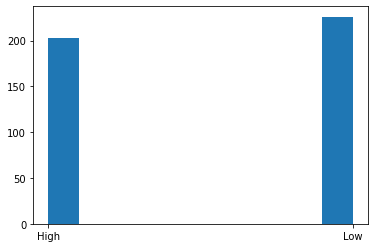

In [15]:
plt.hist(target)